# Numerical Exercises 11: Linear Fit

In [30]:
from LinearModel import LinearModel    
import matplotlib.pyplot as plt   
import numpy as np
import os

model_path = "./Models/"
hist_path = "./Histories/"

In [31]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In this first exercise I will test the ability of a NN to fit and predict data distributed along a linear function, in particular: $$f(x)=2x+1$$
For such a function the NN architecture is naturally determined, in fact we need a network with only one neuron with a linear activation function; in fact this neuron has exactly two free parameters, which represent the slope of the activation function and its bias, thus being able to exactly math our target function $f$. Therefore the architecture is fixed, and I will then concentrate on the effect of three other parameters on the prediction quality:

1. Standard deviation of the training data noise $\sigma$
2. Number of epochs $N_{Epochs}$
3. Number of training points $N_{Train}$

For each of these quantity the testing procedure has been to fix all the other parameters and let the quantity in analysis vary, eventually comparing the final results.

At first, I focused on $\sigma$ and I let it take the following values: $\sigma\in[0.0,0.25,0.5,0.75]$.

Loading pre-trained model...
m: [[1.9173524]], b: [0.99851614]
Loading pre-trained model...
m: [[1.9458845]], b: [0.97288704]
Loading pre-trained model...
m: [[1.9774417]], b: [0.94731015]
Loading pre-trained model...
m: [[1.9429463]], b: [0.92059624]


/tmp/ipykernel_1829/1703934039.py:69: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


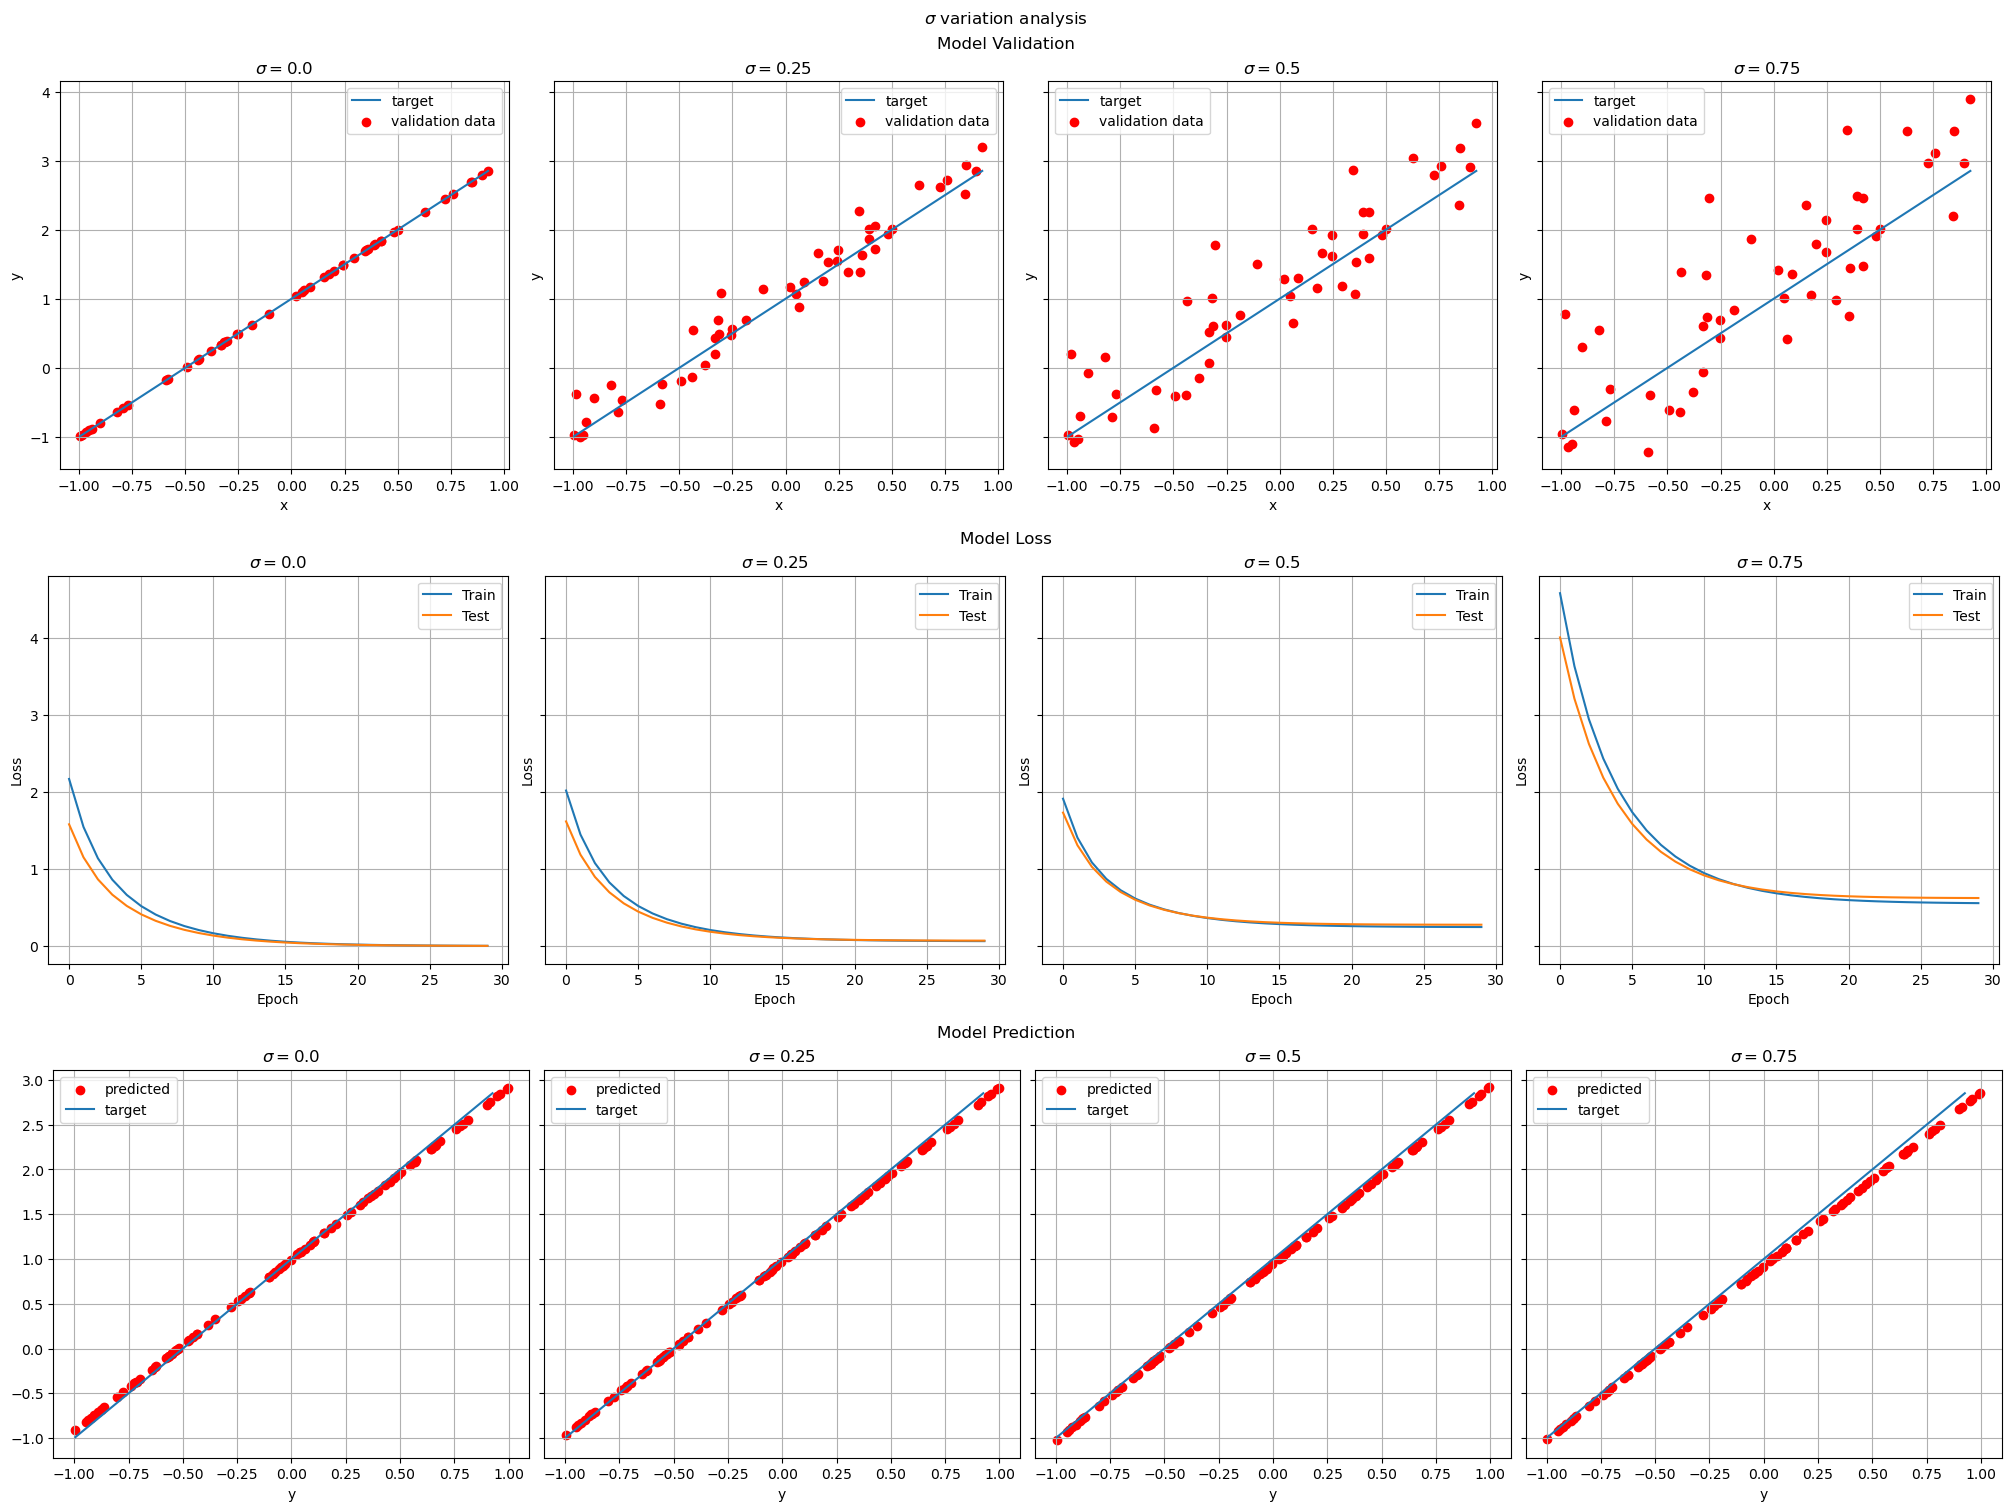

In [35]:
Sigmas = [0.0, 0.25, 0.5, 0.75]
Titles = ["Model Validation", "Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle(r'$\sigma$ variation analysis')
figure.set_size_inches(20, 15)

subfigs = figure.subfigures(nrows=3, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(Sigmas), sharey = 'row'))


x_predicted = np.random.uniform(-1, 1, 100)

for idx, Sigma in enumerate(Sigmas):

    model_filename = model_path + "LM_sigma_" + str(Sigma) + ".keras"
    hist_filename = hist_path + "hist_sigma_" + str(Sigma) + ".npy"

    LM = LinearModel(30, 500, Sigma, m, 1, False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        LM.TrainModel()
        LM.SaveModel(model_filename, hist_filename)

    else:

        LM.LoadModel(model_filename, hist_filename)

    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.set_title(r'$\sigma=' + str(Sigma) + '$')
    valid_ax.set_xlabel("x")
    valid_ax.set_ylabel("y")
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title(r'$\sigma=' + str(Sigma) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "predicted")
    predict_ax.set_title(r'$\sigma=' + str(Sigma) + '$')
    predict_ax.set_xlabel("x")
    predict_ax.set_xlabel("y")
    predict_ax.plot(LM.x_valid, LM.y_target, label = "target")
    predict_ax.legend()
    predict_ax.grid(True)

figure.show()

By looking at the plots, we can see that:

- As $\sigma$ increases the loss (both in train and test) increases. This is expected, since an higher noise generally leads to a less defined $f$.
- For higher values of $\sigma$ the train loss is lower than the test loss. This is again expected, since the model tends to fit at best the sparse input data.
- Besides of course the situation in which $\sigma=0.0$, which is only a reference scenario (a prediction problem by definition has some noise), the best result is obtained for $\sigma=0.25$, which I will use in next tests.

Then I analyzed how $N_{Epoch}$ affects the predictions. Here I used $N_{Epoch}\in[10,30,70,100]$.

Loading pre-trained model...
m: [[0.9991843]], b: [0.92027324]
Loading pre-trained model...
m: [[2.000952]], b: [0.973835]
Loading pre-trained model...
m: [[2.0231137]], b: [0.9742761]
Loading pre-trained model...
m: [[2.0232308]], b: [0.97427803]


/tmp/ipykernel_1829/857182188.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


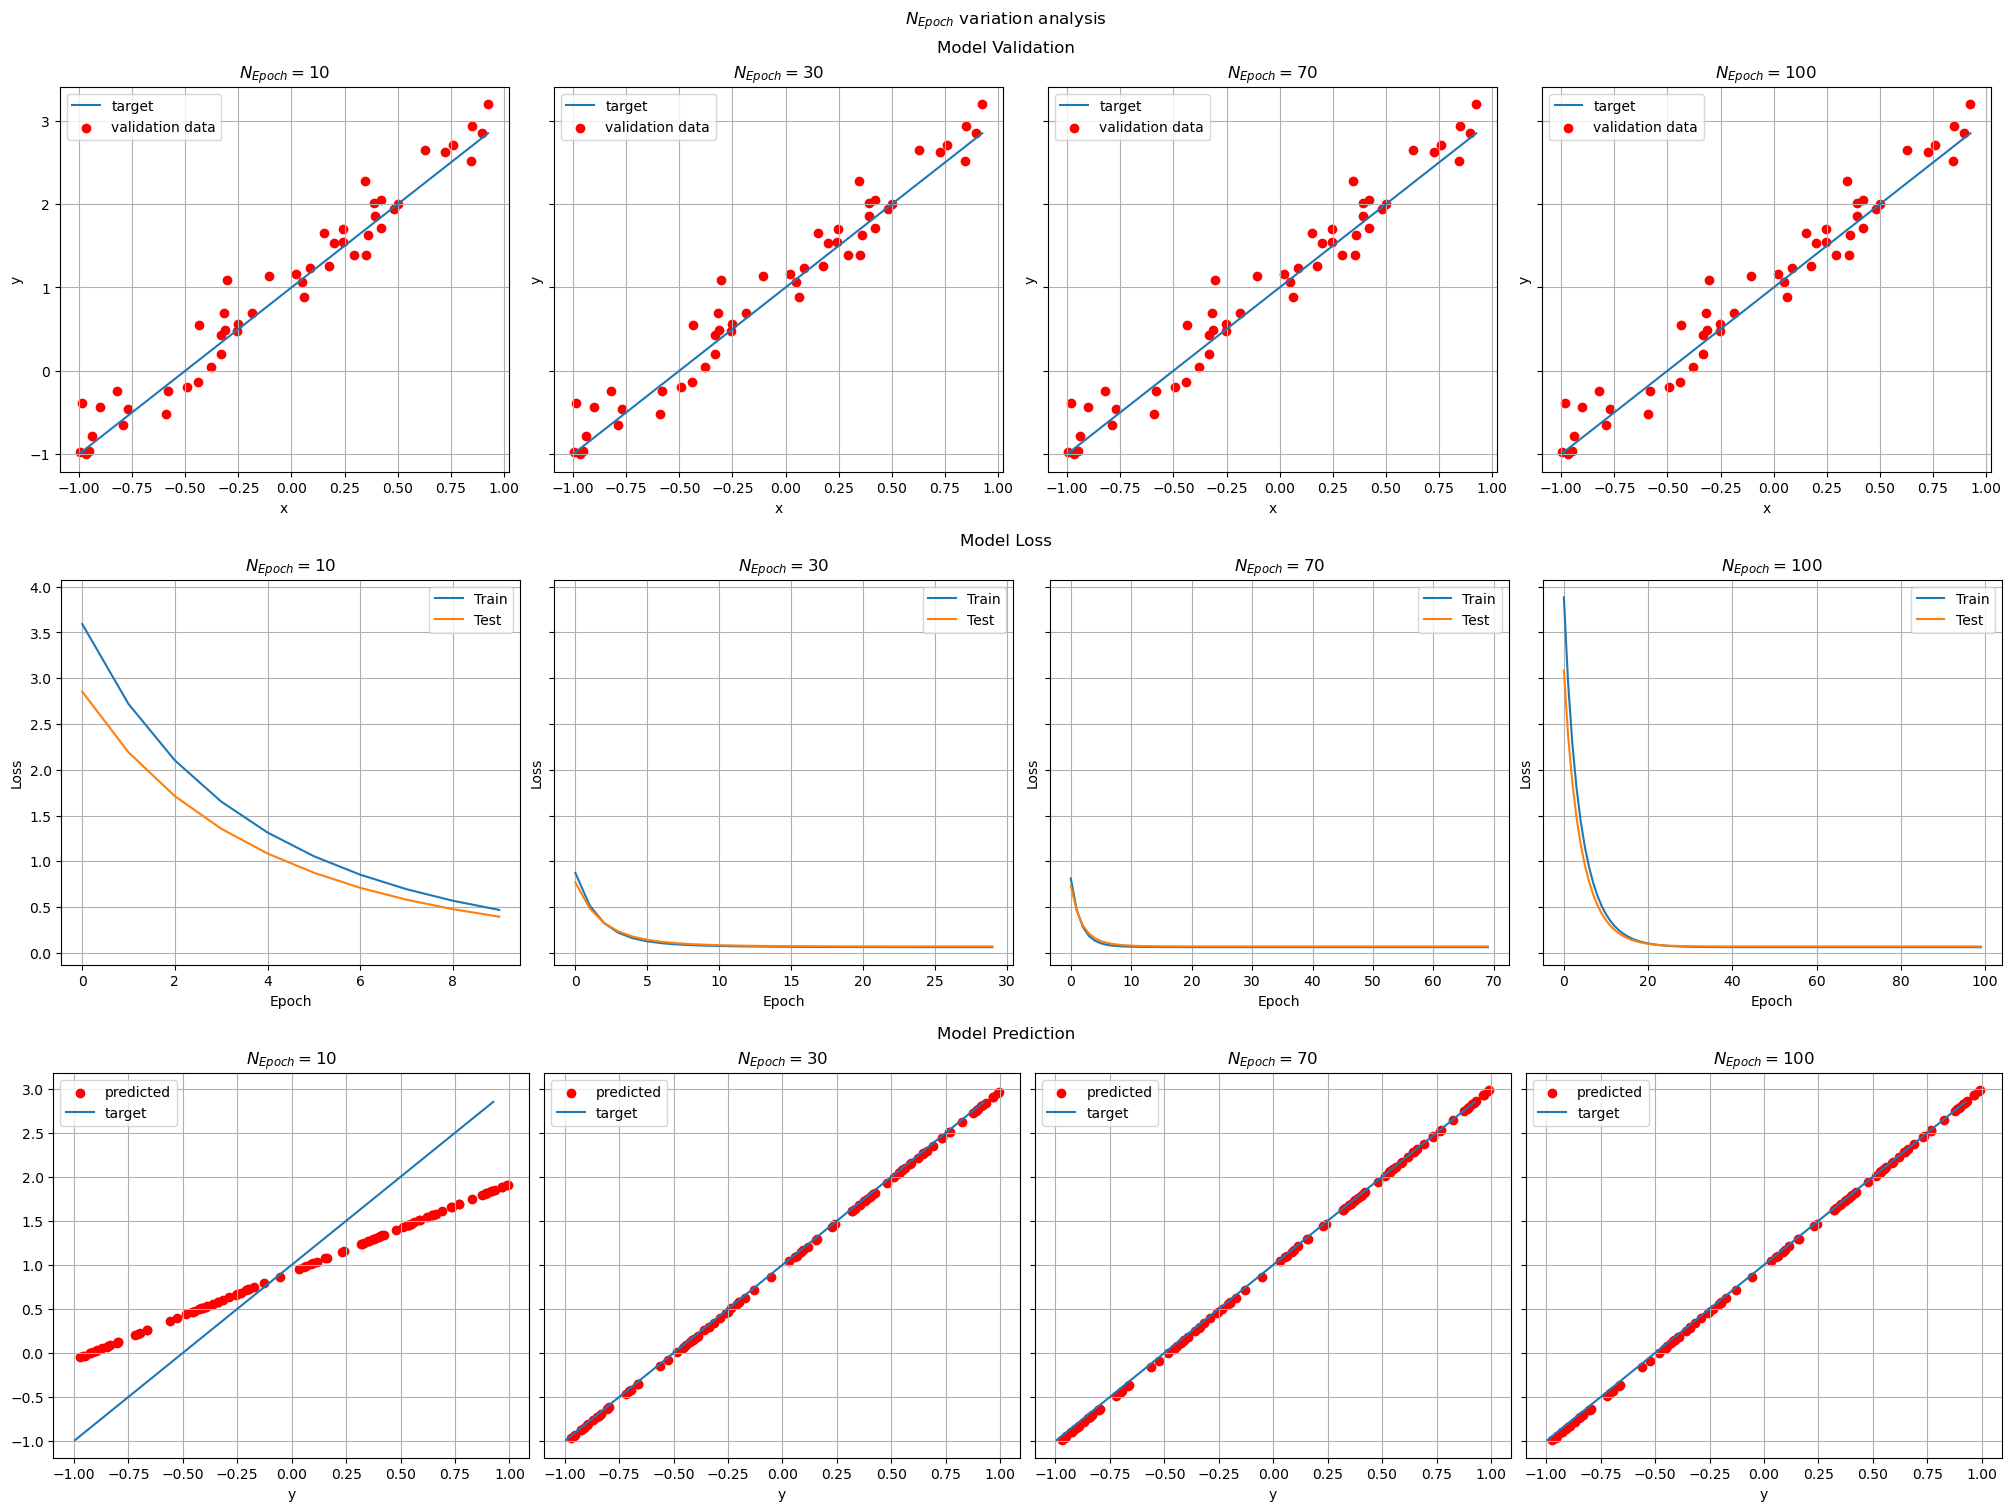

In [33]:
N_Epochs = [10, 30, 70, 100]
Sigma = 0.25

Titles = ["Model Validation", "Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle(r'$N_{Epoch}$ variation analysis')
figure.set_size_inches(20, 15)

subfigs = figure.subfigures(nrows=3, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(N_Epochs), sharey = 'row'))

x_predicted = np.random.uniform(-1, 1, 100)

for idx, N_Epoch in enumerate(N_Epochs):

    model_filename = model_path + "LM_epochs_" + str(N_Epoch) + ".keras"
    hist_filename = hist_path + "hist_epochs_" + str(N_Epoch) + ".npy"

    LM = LinearModel(N_Epoch, 500, Sigma, m, 1, False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        LM.TrainModel()
        LM.SaveModel(model_filename, hist_filename)

    else:

        LM.LoadModel(model_filename, hist_filename)

    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.set_title(r'$N_{Epoch}=' + str(N_Epoch) + '$')
    valid_ax.set_xlabel("x")
    valid_ax.set_ylabel("y")
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title(r'$N_{Epoch}=' + str(N_Epoch) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "predicted")
    predict_ax.plot(LM.x_valid, LM.y_target, label = "target")
    predict_ax.set_title(r'$N_{Epoch}=' + str(N_Epoch) + '$')
    predict_ax.set_xlabel("x")
    predict_ax.set_xlabel("y")
    predict_ax.legend()
    predict_ax.grid(True)

figure.show()

Clearly we expect, for an higher value of $N_{Epoch}$, the final prediction to improve. This is certainly true but, as we can see from the plots, anything higher than $30$ epochs did not lead to a great improvement in the results but it only lengthened the execution. On the other hand, $N_{Epoch}=10$ certainly is too low, and the result is completely off. I then decided to choose as a best value $N_{Epoch}=30$.


Finally, I let $N_{Train}$ vary, allowing it to assume the values $N_{Train}\in[50,500,1000,3000]$.

Loading pre-trained model...
m: [[0.9714869]], b: [0.8554088]
Loading pre-trained model...
m: [[1.9861563]], b: [0.9735804]
Loading pre-trained model...
m: [[1.9926345]], b: [1.0036278]
Loading pre-trained model...
m: [[1.9893079]], b: [0.9998195]


/tmp/ipykernel_1829/4032883641.py:71: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


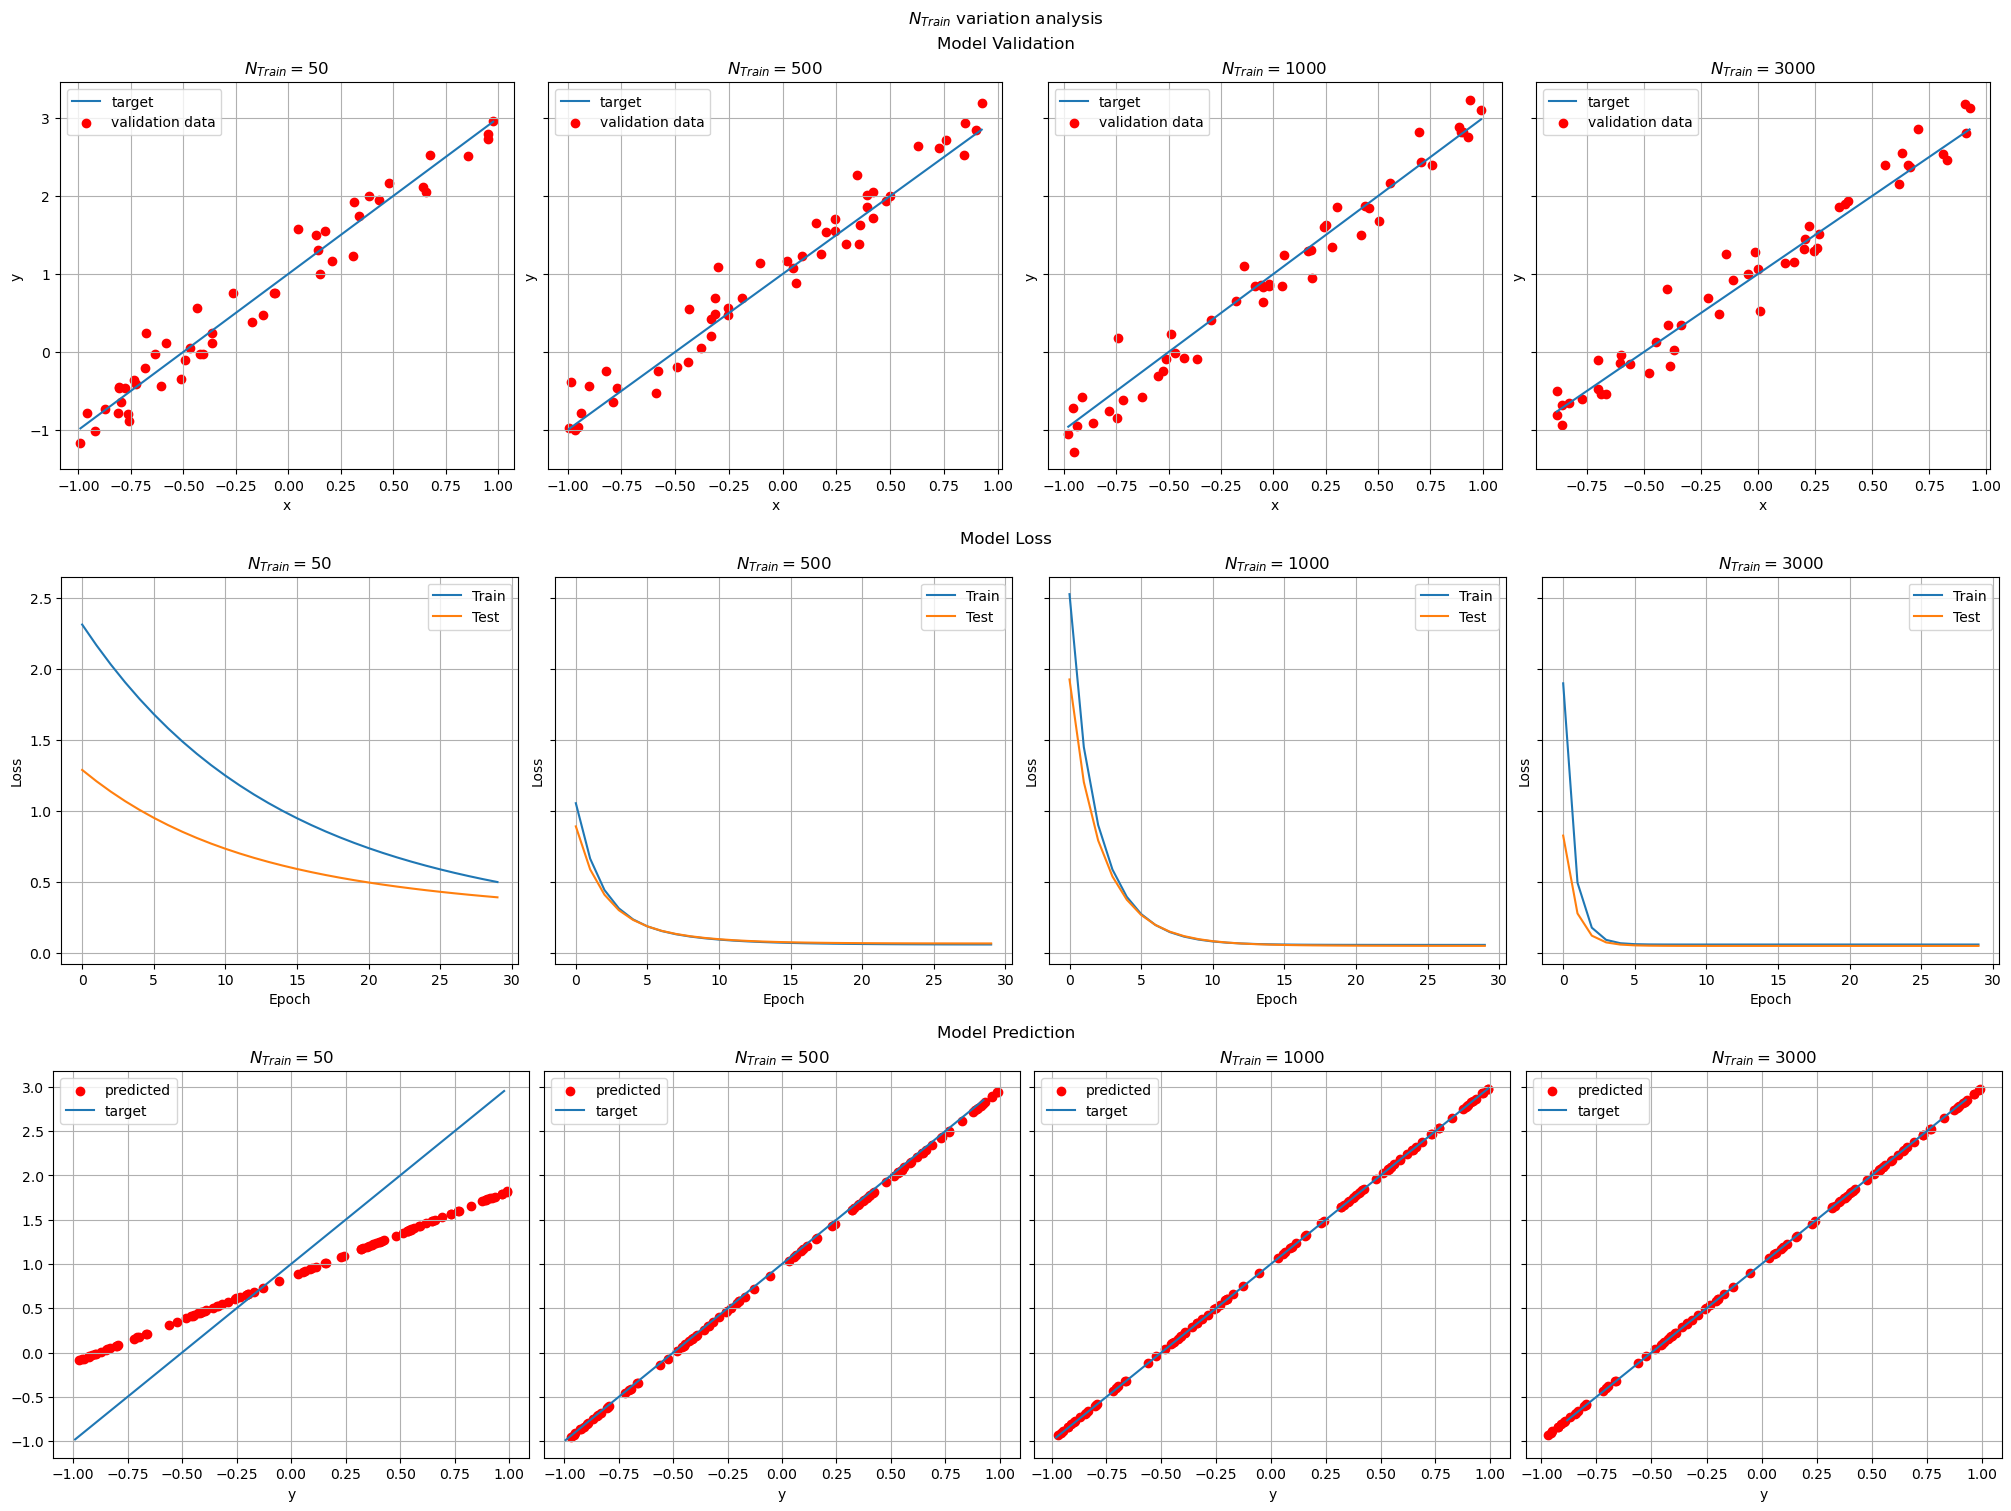

In [34]:
N_Trains = [50, 500, 1000, 3000]
Sigma = 0.25
N_Epoch = 30

Titles = ["Model Validation", "Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle(r'$N_{Train}$ variation analysis')
figure.set_size_inches(20, 15)

subfigs = figure.subfigures(nrows=3, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(N_Epochs), sharey = 'row'))

x_predicted = np.random.uniform(-1, 1, 100)

for idx, N_Train in enumerate(N_Trains):

    model_filename = model_path + "LM_train_" + str(N_Train) + ".keras"
    hist_filename = hist_path + "hist_train_" + str(N_Train) + ".npy"

    LM = LinearModel(N_Epoch, N_Train, Sigma, m, 1, False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        LM.TrainModel()
        LM.SaveModel(model_filename, hist_filename)

    else:

        LM.LoadModel(model_filename, hist_filename)

    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.set_title(r'$N_{Train}=' + str(N_Train) + '$')
    valid_ax.set_xlabel("x")
    valid_ax.set_ylabel("y")
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title(r'$N_{Train}=' + str(N_Train) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "predicted")
    predict_ax.plot(LM.x_valid, LM.y_target, label = "target")
    predict_ax.set_title(r'$N_{Train}=' + str(N_Train) + '$')
    predict_ax.set_xlabel("x")
    predict_ax.set_xlabel("y")
    predict_ax.legend()
    predict_ax.grid(True)

figure.show()

The impact of $N_{Train}$ appears to be the most relevant between the parameters I changed. In fact, we can clearly see that for higher value the result certainly improved, leading to an almost perfect superposition between the predictions and the target curve. But, as in the $N_{Epoch}$ case, we do not observe a significant improvement after a certain value (here $N_{Train}$), with only an impact on execution time. Considering these, I think that the best value is given by $N_{Train} = 1000$.